## Reading data from a json file

- For this example, download data for Kenai River late-run sockeye from the Alaska Fish and Game website
- here is a direct link to generate the json file for 2017-2018 data: https://www.adfg.alaska.gov/sf/FishCounts/index.cfm?ADFG=export.JSON&countLocationID=40&year=2018,2017&speciesID=420

- or go here and select the wanted years to generate data for: https://www.adfg.alaska.gov/sf/FishCounts/index.cfm?ADFG=main.displayResults&COUNTLOCATIONID=40&SpeciesID=420

### the packages we need

In [462]:
import pandas as pd #data analysis package
import numpy as np # numerical analysis package
import matplotlib.pyplot as plt # plotting graphs
import datetime as dt # converting date time formats

#for animations
from matplotlib import animation, rc
from IPython.display import HTML

### read in a json file

In [463]:
data = pd.read_json("fish1979-2018.json", typ='series')

print(data)

COLUMNS    [YEAR, COUNTDATE, FISHCOUNT, SPECIESID, COUNTL...
DATA       [[2018, July, 01 2018 00:00:00, 1966, 420, 40,...
dtype: object


### take a look at one element, you can also explore the json file within jupyter lab

In [465]:
print(data[1][0])

['2018', 'July, 01 2018 00:00:00', '1966', '420', '40', 'Kenai River (late-run sockeye)', 'Sockeye']


### take a look at the keys for the jason file that was imported

In [467]:
data.keys()

Index(['COLUMNS', 'DATA'], dtype='object')

### This is a "fish count" for the first entry in the file

In [147]:
data['DATA'][0][2]

'1966'

### determing the number of records in the json file

In [148]:
t = len(data['DATA'])
rangt = range(t)


### pull just the fishcounts in a dictionary of arrays, along with the day of year of the count

In [481]:
firstyear = 1979
lastyear = 2018

#setup a dictionary that is intended to store arrays for fishcounts and the day of year for that fishcount

fishcount = {}
dayofyear = {}

#loop the data into the dictionary

for year in range(firstyear,lastyear+1):
    
    fishcountarray = []
    dayofyeararray = []
    for i in rangt:
        if data['DATA'][i][0] == str(year):
            fishcountarray.append(int(data['DATA'][i][2])) # need to convert the counts into an int data type
            dayofyeararray.append(dt.datetime.strptime(data['DATA'][i][1], '%B, %d %Y %H:%M:%S').timetuple().tm_yday)
    
    fishcount.update({str(year): fishcountarray})
    dayofyear.update({str(year): dayofyeararray})

### make a static bar graph with the years overlayed

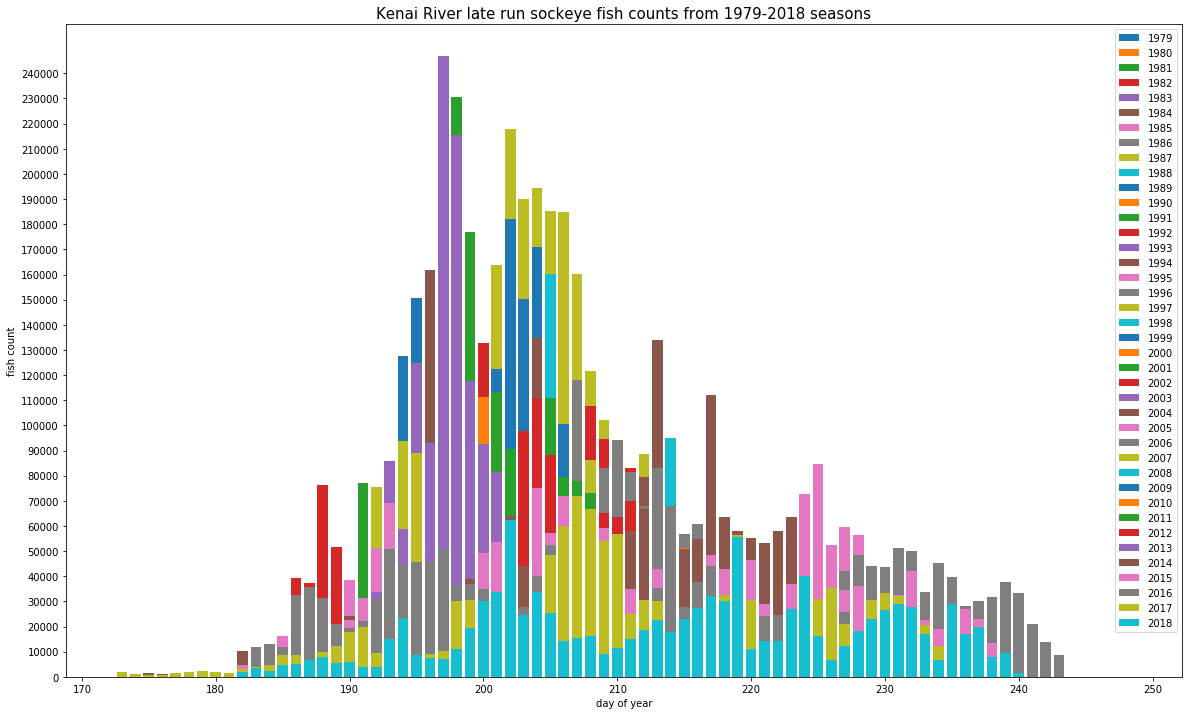

In [482]:
#set up the plot title, labels

plt.figure(figsize=(20, 12))
plt.xlabel('day of year')
plt.ylabel("fish count")
plt.title("Kenai River late run sockeye fish counts from " + str(firstyear) + "-" + str(lastyear) + " seasons",fontsize=15)

#plot each year's fishcount by day of year

for year in range(firstyear,lastyear+1):
    #plt.plot(dayofyear[str(year)],fishcount[str(year)],label= str(year)) #line plot instead of bar graph
    plt.bar(dayofyear[str(year)],fishcount[str(year)],label= str(year))

plt.yticks(np.arange(0,250000,10000))
plt.legend(loc='best')

## Do it again, as an animated graph

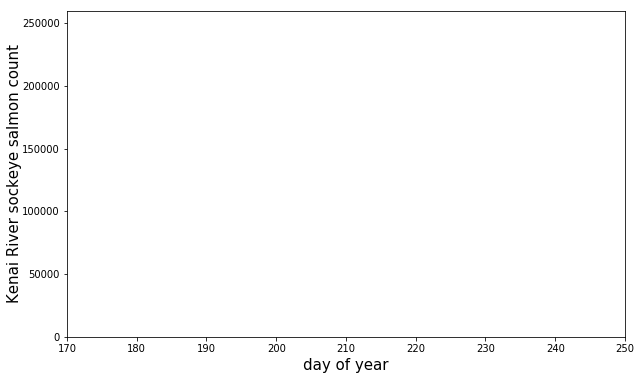

In [488]:
# setup the plot area

fig, ax = plt.subplots()

fig.set_size_inches(10, 6) # size of the animation window
ax.set_xlim(( 170, 250)) # x range
ax.set_ylim((0, 260000)) # y range
ax.set_xlabel('day of year',fontsize=15)
ax.set_ylabel('Kenai River sockeye salmon count',fontsize=15,labelpad=0)

# set up an init function to clear the graph area
def init():
    return ax.bar([],[])

In [484]:
#the animate function

def animate(i):
    x = dayofyear[str(i+firstyear)]
    y = fishcount[str(i+firstyear)]

    #animate the title as a year
    ax.set_title(str(i+firstyear),fontsize=20)
    return ax.bar(x,y)

In [487]:
#frames is the number of frames
# interval is the speed between frames

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=lastyear-firstyear+1, interval=200, 
                               blit=True)

In [486]:

HTML(anim.to_html5_video())

In [248]:
#HTML(anim.to_jshtml())